# Setup

### Libraries and Packages

In [3]:
import pandas as pd
import datetime
import numpy as np
from datetime import date, timedelta, datetime
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import webbrowser
import os

### Import Data


In [4]:
# ACLED Ethiopia - for conflict analysis
eth = pd.read_csv(r'C:\Users\Jon\Documents\GitHub\comp_jour_fall22\final project\data\eth.csv',',')

# ACLED Ukraine - for conflict analysis
ukr = pd.read_csv(r'C:\Users\Jon\Documents\GitHub\comp_jour_fall22\final project\data\ukr.csv',',')

# NYT Metadata - for news trend analysis
nyt = pd.read_csv(r'C:\Users\Jon\Documents\GitHub\comp_jour_fall22\final project\data\times.csv',',')

C:\Users\Jon\AppData\Local\Temp\ipykernel_31260\1140291723.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  eth = pd.read_csv(r'C:\Users\Jon\Documents\GitHub\comp_jour_fall22\final project\data\eth.csv',',')
C:\Users\Jon\AppData\Local\Temp\ipykernel_31260\1140291723.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  ukr = pd.read_csv(r'C:\Users\Jon\Documents\GitHub\comp_jour_fall22\final project\data\ukr.csv',',')
C:\Users\Jon\AppData\Local\Temp\ipykernel_31260\1140291723.py:8: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  nyt = pd.read_csv(r'C:\Users\Jon\Documents\GitHub\comp_jour_fall22\final project\data\times.csv',',')


### Formatting

In [5]:
# Dates

eth['event_date'] = pd.to_datetime(eth['event_date'],format = '%d %B %Y')
eth['year'] = pd.to_datetime(eth['year'], format = '%Y')
ukr['event_date'] = pd.to_datetime(ukr['event_date'],format = '%d %B %Y')
ukr['year'] = pd.to_datetime(ukr['year'], format = '%Y')
nyt['date'] = pd.to_datetime(nyt['date'],format = '%Y-%m-%d')

# IDs

convert_dict = {
    'data_id' : str,
    'event_id_no_cnty' : str,
    'inter1' : str,
    'inter2' : str,
    'interaction' : str
}

eth = eth.astype(convert_dict)
ukr = ukr.astype(convert_dict)

# Order

eth = eth.sort_values(by = 'event_date', ascending = True)
ukr = ukr.sort_values(by = 'event_date', ascending = True)

# Exploratory Analysis

### Basic Fact-finding - Ukraine vs. Ethiopia

In [6]:
print('Ethiopia incidents:',len(eth),'\nUkraine incidents:',len(ukr))

Ethiopia incidents: 3700 
Ukraine incidents: 42231


So far, it looks like there is far more data for Ukraine than there is for Ethiopia - over 10 times more, in fact. This is surprising because the Ethiopian conflict has been going on for over a year longer than the fighting in Ukraine.

In [7]:
eth_civ = eth[eth.actor2 == 'Civilians (Ethiopia)']
ukr_civ = ukr[ukr.actor2 == 'Civilians (Ukraine)']

print(
    'Civilian-involved incidents comprise ',(len(eth_civ)/len(eth))*100,'% of all ACLED incidents in Ethiopia.\n',
    'Civilian-involved incidents comprise ',(len(ukr_civ)/len(ukr))*100,'% of all ACLED incidents in Ukraine.',sep=''
)

Civilian-involved incidents comprise 31.324324324324326% of all ACLED incidents in Ethiopia.
Civilian-involved incidents comprise 7.215078970424569% of all ACLED incidents in Ukraine.


When we filter by events where actor2 = Civilians, i.e. civilians were victims, we can see that a far greater percent of incidents targeted noncombatants in Ethiopia than in Ukraine. 

In [8]:
eth_civ_acts = eth_civ.groupby(by = ['actor1']).count().sort_values(by = 'data_id',ascending = False)
ukr_civ_acts = ukr_civ.groupby(by = ['actor1']).count().sort_values(by = 'data_id',ascending = False)

In [9]:
print(
    'The perpetrators of the most violence against civilians in Ukraine are ',ukr_civ_acts.index[0],', ',ukr_civ_acts.index[1],' and ',ukr_civ_acts.index[2],'.\nThe perpetrators of the most violence against civilians in Ethiopia are ',eth_civ_acts.index[0],', ',eth_civ_acts.index[1],' and ',eth_civ_acts.index[2],'.',sep=''
)

The perpetrators of the most violence against civilians in Ukraine are Military Forces of Russia (2000-), Military Forces of Russia (2000-) Air Force and Unidentified Armed Group (Ukraine).
The perpetrators of the most violence against civilians in Ethiopia are TPLF: Tigray People's Liberation Front, Military Forces of Ethiopia (2018-) and OLF: Oromo Liberation Front (Shane Splinter Faction).


In [10]:
eth_ints = eth.loc[eth['fatalities'] > 0,['interaction','fatalities']].groupby(by = ['interaction']).count().sort_values(by = 'fatalities',ascending = False)
ukr_ints = ukr.loc[ukr['fatalities'] > 0,['interaction','fatalities']].groupby(by = ['interaction']).count().sort_values(by = 'fatalities',ascending = False)


In [11]:
eth_ints

,fatalities
interaction,
12,481
17,248
37,218
13,201
27,145
47,120
14,60
44,49
78,36


In [12]:
ukr_ints

,fatalities
interaction,
78,1339
18,776
12,482
17,27
47,16
37,15
13,14
80,14
48,13


In [13]:
eth_cf = eth.copy()
eth_cf['cf_eth'] = eth_cf['fatalities'].cumsum(axis=0)
eth_cf = eth_cf[['event_date','cf_eth']]
eth_cf.rename({"event_date" : "date"}, axis = 1, inplace=True)
eth_cf.drop_duplicates(inplace=True)
eth_cf = eth_cf.groupby('date').max()
eth_cf['date'] = eth_cf.index
eth_cf.index = range(0,len(eth_cf))
eth_cf = eth_cf[['date','cf_eth']]
eth_cf

,date,cf_eth
0,2020-11-01,36
1,2020-11-03,103
2,2020-11-04,169
3,2020-11-05,181
4,2020-11-06,186
...,...,...
677,2022-11-28,18658
678,2022-11-29,18669
679,2022-11-30,18679
680,2022-12-01,18679


In [14]:
ukr_cf = ukr.copy()
ukr_cf['cf_ukr'] = ukr_cf['fatalities'].cumsum(axis=0)
ukr_cf = ukr_cf[['event_date','cf_ukr']]
ukr_cf.rename({"event_date" : "date"}, axis = 1, inplace=True)
ukr_cf.drop_duplicates(inplace=True)
ukr_cf = ukr_cf.groupby('date').max()
ukr_cf['date'] = ukr_cf.index
ukr_cf.index = range(0,len(ukr_cf))
ukr_cf = ukr_cf[['date','cf_ukr']]
ukr_cf

,date,cf_ukr
0,2020-11-02,0
1,2020-11-03,0
2,2020-11-04,0
3,2020-11-05,0
4,2020-11-06,2
...,...,...
756,2022-11-28,24181
757,2022-11-29,24184
758,2022-11-30,24304
759,2022-12-01,24382


# NYT Trends

In [15]:
def containsTig(lst):
  if lst.count('Tigrayans (Ethnic Group)') > 0:
    return True
  else:
    return False

nyt_tig = nyt.copy()
nyt_tig['tig_tag'] = nyt_tig['keywords'].apply(containsTig)
nyt_tig = nyt_tig[(nyt_tig.tig_tag == True)]
nyt_tig

,headline,date,doc_type,material_type,section,keywords,tig_tag
1462,Ethiopia Escalates Fight Against Its Powerful ...,2020-11-05,article,News,NaN,"['War and Armed Conflicts', 'Tigrayans (Ethnic...",True
2442,What’s Happening in Ethiopia Is a Tragedy,2020-11-11,article,Op-Ed,NaN,"['War and Armed Conflicts', 'Tigrayans (Ethnic...",True
2970,They Once Ruled Ethiopia. Now They Are Fightin...,2020-11-15,article,News,NaN,"['Tigrayans (Ethnic Group)', 'War and Armed Co...",True
4642,I Was a Child Refugee. Another War in Ethiopia...,2020-11-26,article,Op-Ed,NaN,"['War and Armed Conflicts', 'Tigrayans (Ethnic...",True
4865,Ethiopia Claims Victory in Tigray Conflict Aft...,2020-11-28,article,News,NaN,"['War and Armed Conflicts', 'Tigrayans (Ethnic...",True
5561,"From Shelled Ethiopian City, Doctors Tally Dea...",2020-12-03,article,News,NaN,"['Humanitarian Aid', 'War and Armed Conflicts'...",True
6346,Fleeing Ethiopians Tell of Ethnic Massacres in...,2020-12-09,article,News,NaN,"['War and Armed Conflicts', 'Tigrayans (Ethnic...",True
6777,"As War Goes On in Ethiopia, Ethnic Harassment ...",2020-12-12,article,News,NaN,"['Tigrayans (Ethnic Group)', 'Discrimination',...",True
7897,"‘I Miss Home’: In Tigray Conflict, Displaced C...",2020-12-20,article,News,NaN,"['Refugees and Displaced Persons', 'Tigrayans ...",True
20720,Ethiopia Declares State of Emergency as Rebels...,2021-11-02,article,News,NaN,"['War and Armed Conflicts', 'Defense and Milit...",True


In [16]:
def containsUkr(lst):
  if lst.count('Russian Invasion of Ukraine (2022)') > 0:
    return True
  else:
    return False

nyt_ukr = nyt.copy()
nyt_ukr['ukr_tag'] = nyt_ukr['keywords'].apply(containsUkr)
nyt_ukr = nyt_ukr[(nyt_ukr.ukr_tag == True)]
nyt_ukr

,headline,date,doc_type,material_type,section,keywords,ukr_tag
67500,Safety Concerns Overshadow Europe’s First New ...,2022-10-01,article,News,NaN,"['Pipelines', 'Natural Gas', 'Oil (Petroleum) ...",True
67501,"Panic, Bribes, Ditched Cars and a Dash on Foot...",2022-10-01,article,News,NaN,"['Russian Invasion of Ukraine (2022)', 'Refuge...",True
67529,"Broken glass, blown-out tires and a crater sho...",2022-10-01,article,News,NaN,['Russian Invasion of Ukraine (2022)'],True
67532,Vladimir Putin’s ‘Medea’,2022-10-01,article,Op-Ed,NaN,['Russian Invasion of Ukraine (2022)'],True
67534,‘Naked Fear’: A Pipeline Attack Fans Anxiety i...,2022-10-01,article,News,NaN,"['Russian Invasion of Ukraine (2022)', 'Pipeli...",True
...,...,...,...,...,...,...,...
109969,What to Know About Russia’s Annexation of Four...,2022-09-29,article,News,NaN,"['War and Armed Conflicts', 'Russian Invasion ...",True
109983,Army Doctor and Spouse Plotted to Give Russia ...,2022-09-29,article,News,NaN,"['Espionage and Intelligence Services', 'Priva...",True
110016,Your Friday Briefing,2022-09-30,article,briefing,NaN,"['War and Armed Conflicts', 'Midterm Elections...",True
110024,Ukraine says 25 people are dead in an attack o...,2022-09-30,article,News,NaN,['Russian Invasion of Ukraine (2022)'],True


## Summing and Analysis

In [17]:
total_eth_fat = eth['fatalities'].sum()
total_ukr_fat = eth['fatalities'].sum()

In [18]:
print('ARTICLES PER 1,000 FATALITIES')
print('Ethiopia: ',((nyt_tig.shape[0]*1000)/total_eth_fat))
print('Ukraine: ',((nyt_ukr.shape[0]*1000)/total_ukr_fat))

ARTICLES PER 1,000 FATALITIES
Ethiopia:  2.621863128043234
Ukraine:  191.71705281181443


Building Articles over Time axes

In [19]:
daily_articles = pd.DataFrame(columns = ('date','eth','ukr'))


In [20]:
start_date = date(2020,11,1)
end_date = date.today()

delta = end_date - start_date

days=[]
for i in range(delta.days + 1):
    day = start_date + timedelta(days=i)
    days.append(day)

daily_articles['date'] = days
daily_articles['date'] = daily_articles['date'].astype('datetime64[ns]')

daily_articles = daily_articles.merge(eth_cf, how='left', left_on = 'date', right_on='date')
daily_articles = daily_articles.merge(ukr_cf, how='left', left_on = 'date', right_on='date')
daily_articles.fillna(method='ffill', inplace = True)
daily_articles


,date,eth,ukr,cf_eth,cf_ukr
0,2020-11-01,NaN,NaN,36.0,NaN
1,2020-11-02,NaN,NaN,36.0,0.0
2,2020-11-03,NaN,NaN,103.0,0.0
3,2020-11-04,NaN,NaN,169.0,0.0
4,2020-11-05,NaN,NaN,181.0,0.0
...,...,...,...,...,...
767,2022-12-08,NaN,NaN,18689.0,24387.0
768,2022-12-09,NaN,NaN,18689.0,24387.0
769,2022-12-10,NaN,NaN,18689.0,24387.0
770,2022-12-11,NaN,NaN,18689.0,24387.0


In [21]:
start_date = date(2020,11,1)
end_date = date.today()

delta = end_date - start_date

days=[]
for i in range(delta.days + 1):
    day = start_date + timedelta(days=i)
    days.append(day)

eth_bool_arts = pd.DataFrame()
eth_bool_arts['date'] = days
eth_bool_arts['date'] = eth_bool_arts['date'].astype('datetime64[ns]')
eth_bool_arts = eth_bool_arts.merge(nyt_tig, how='left',left_on='date',right_on='date')
eth_bool_arts[['date','headline']]
eth_bool_arts['eth_arts'] = np.where(pd.notna(eth_bool_arts['headline']), 1, 0)
eth_bool_arts = eth_bool_arts[['date','eth_arts']]
eth_bool_arts['eth_arts'] = eth_bool_arts['eth_arts'].cumsum()
eth_bool_arts

ukr_bool_arts = pd.DataFrame()
ukr_bool_arts['date'] = days
ukr_bool_arts['date'] = ukr_bool_arts['date'].astype('datetime64[ns]')
ukr_bool_arts = eth_bool_arts.merge(nyt_ukr, how='left',left_on='date',right_on='date')
ukr_bool_arts[['date','headline']]
ukr_bool_arts['ukr_arts'] = np.where(pd.notna(ukr_bool_arts['headline']), 1, 0)
ukr_bool_arts = ukr_bool_arts[['date','ukr_arts']]
ukr_bool_arts['ukr_arts'] = ukr_bool_arts['ukr_arts'].cumsum()
ukr_bool_arts


,date,ukr_arts
0,2020-11-01,0
1,2020-11-02,0
2,2020-11-03,0
3,2020-11-04,0
4,2020-11-05,0
...,...,...
4060,2022-12-09,3582
4061,2022-12-09,3583
4062,2022-12-10,3583
4063,2022-12-11,3583


In [22]:
daily_articles = daily_articles.merge(eth_bool_arts, how='left', left_on = 'date', right_on='date')
daily_articles = daily_articles.merge(ukr_bool_arts, how='left', left_on = 'date', right_on='date')
daily_articles

,date,eth,ukr,cf_eth,cf_ukr,eth_arts,ukr_arts
0,2020-11-01,NaN,NaN,36.0,NaN,0,0
1,2020-11-02,NaN,NaN,36.0,0.0,0,0
2,2020-11-03,NaN,NaN,103.0,0.0,0,0
3,2020-11-04,NaN,NaN,169.0,0.0,0,0
4,2020-11-05,NaN,NaN,181.0,0.0,1,0
...,...,...,...,...,...,...,...
4062,2022-12-09,NaN,NaN,18689.0,24387.0,49,3582
4063,2022-12-09,NaN,NaN,18689.0,24387.0,49,3583
4064,2022-12-10,NaN,NaN,18689.0,24387.0,49,3583
4065,2022-12-11,NaN,NaN,18689.0,24387.0,49,3583


In [23]:
daily_articles = daily_articles[['date','cf_eth','cf_ukr','eth_arts','ukr_arts']]
daily_articles

,date,cf_eth,cf_ukr,eth_arts,ukr_arts
0,2020-11-01,36.0,NaN,0,0
1,2020-11-02,36.0,0.0,0,0
2,2020-11-03,103.0,0.0,0,0
3,2020-11-04,169.0,0.0,0,0
4,2020-11-05,181.0,0.0,1,0
...,...,...,...,...,...
4062,2022-12-09,18689.0,24387.0,49,3582
4063,2022-12-09,18689.0,24387.0,49,3583
4064,2022-12-10,18689.0,24387.0,49,3583
4065,2022-12-11,18689.0,24387.0,49,3583


## Visualization

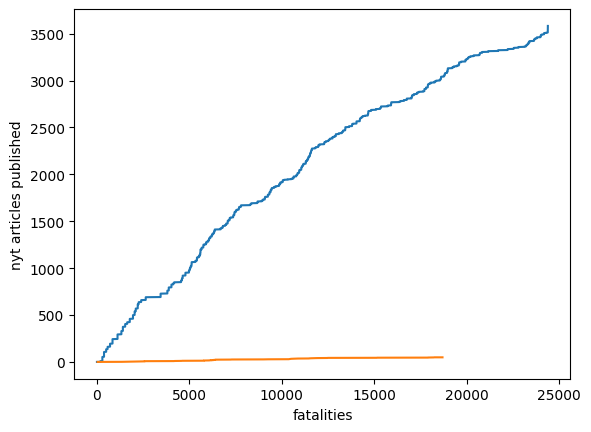

In [24]:
fig, ax = plt.subplots()
ax.set_xlabel('fatalities')
ax.set_ylabel('nyt articles published')
ax.plot(daily_articles['cf_ukr'], daily_articles['ukr_arts'])
ax.plot(daily_articles['cf_eth'], daily_articles['eth_arts'])


([<matplotlib.patches.Wedge at 0x20b00d7f0a0>,
 [Text(-1.043961309790292, 0.3466190757314693, ''),
  Text(1.019608402516728, -0.4127937808607176, ''),
  Text(1.097739926344212, -0.07047733046734983, '')])

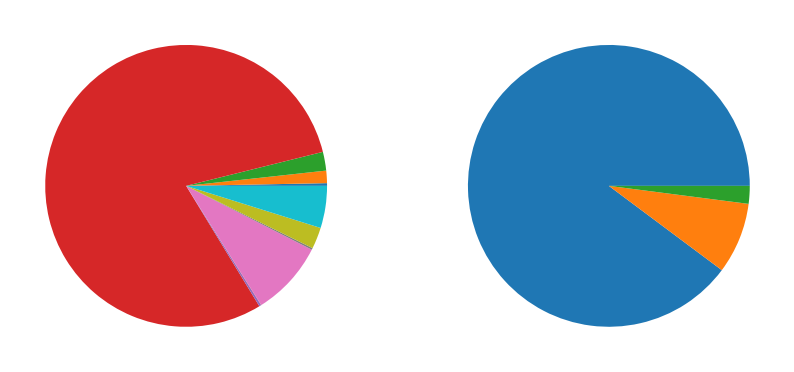

In [25]:
ukr_dtypes = nyt_ukr.groupby(by='material_type').count()
eth_dtypes = nyt_tig.groupby(by='material_type').count()
ukr_dtypes = ukr_dtypes['headline'].tolist()
eth_dtypes = eth_dtypes['headline'].tolist()

fig, ax = plt.subplots(1,2,figsize=(10,25))
ax[0].pie(ukr_dtypes)
ax[1].pie(eth_dtypes)

Text(0.5, 1.0, 'High fatality incidents')

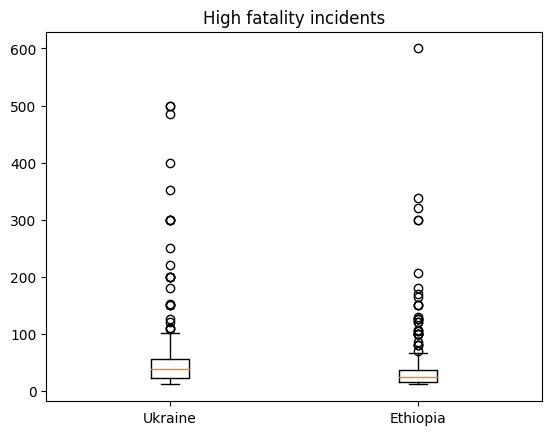

In [26]:
ukr_fatal = ukr[ukr['fatalities'] > 10]
eth_fatal = eth[eth['fatalities'] > 10]
data = [ukr_fatal['fatalities'],eth_fatal['fatalities']]
labels = ['Ukraine','Ethiopia']

fig, ax = plt.subplots()
ax.boxplot(data,labels=labels)
ax.set_title('High fatality incidents')

Text(0.5, 1.0, 'High fatality incidents involving civilians')

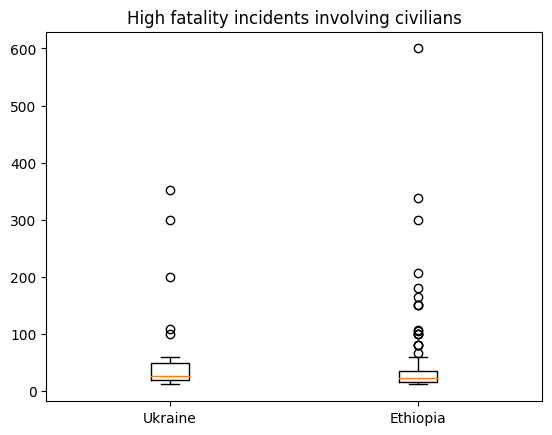

In [27]:
ukr_fatal_civ = ukr[(ukr.fatalities > 10) & (ukr.actor2 == 'Civilians (Ukraine)')]
eth_fatal_civ = eth[(eth.fatalities > 10) & (eth.actor2 == 'Civilians (Ethiopia)')]
data2 = [ukr_fatal_civ['fatalities'],eth_fatal_civ['fatalities']]
labels = ['Ukraine','Ethiopia']

fig, ax = plt.subplots()
ax.boxplot(data2,labels=labels)
ax.set_title('High fatality incidents involving civilians')

## Variables for HTML

In [28]:
total_incidents = len(eth)
total_fatalities = sum(eth.fatalities)
total_civilian_deaths = eth[eth.actor2 == 'Civilians (Ethiopia)']
total_civilian_deaths = sum(total_civilian_deaths.fatalities)
recent_incident = eth.loc[0]['notes']
tigray_incident = [eth[eth['admin1'] == 'Tigray'].sort_values(by = 'fatalities').iloc[-1]['notes'],eth[eth['admin1'] == 'Tigray'].sort_values(by = 'fatalities').iloc[-1]['fatalities']]
non_tigray_incident = [eth[eth['admin1'] != 'Tigray'].sort_values(by = 'fatalities').iloc[-1]['notes'],eth[eth['admin1'] != 'Tigray'].sort_values(by = 'fatalities').iloc[-1]['fatalities']]

## Generate HTML Page

In [30]:
f = open('index.html','w')
html_template = f"""
<!doctype html>
<html>
<head>
<title>Tigray War Lead Generator</title>
<meta name="description" content="Our first page">
<meta name="keywords" content="ethiopia tigray war tplf">
</head>
<body>
<h1>The Tigray War</h1>
<p>Run this app periodically to check for developments in the Tigray War.</p>
<h5>Total Incidents: {total_incidents}</h5>
<h5>Total Deaths: {total_fatalities}</h5>
<h5>Total Civilian Deaths: {total_civilian_deaths}</h5>
<h5>Most Recent Incident: {recent_incident}</h5>
<h5>Deadliest Incident in Tigray: {tigray_incident}</h5>
<h5>Deadliest Incident Outside of Tigray: {non_tigray_incident}</h5>
</body>
</html>
"""
f.write(html_template)
f.close
filename = 'file:///'+os.getcwd()+'/' + 'index.html'
chrome_path = "C:\Program Files (x86)\Google\Chrome\Application\chrome.exe"
webbrowser.open_new_tab(filename)

True